---

<h1 style ="font-family:lucida handwriting">CHERGUI Moad</h1>

---
# TP reseau semantique 

In [1]:
!pip install networkx

## Exercice 1 :

- Un oiseau est un animal qui peut voler.
- Un mammifère est un animal qui allaite ses petits.
- Une chauve-souris est à la fois un mammifère et un oiseau.
- Les chauves-souris ne pondent pas d’œufs.

1. réseau sémantique
```mermaid
    graph
        Animal((Animal))
        Oiseau((Oiseau))
        Mammifere((Mammifère))
        ChauveSouris((Chauve-souris))
        pondre((Pondre))
        Voler((Voler))
        Allaiter((Allaiter))

        Mammifere -->|peut| Allaiter
        Mammifere -->|est un| Animal
        Oiseau -->|est un| Animal
        Oiseau -->|peut| Voler
        ChauveSouris -->|est un| Mammifere
        ChauveSouris -->|est un| Oiseau
        ChauveSouris -->|peut| Voler
        ChauveSouris -->|peut| pondre
        n(("non"))-->pondre
```

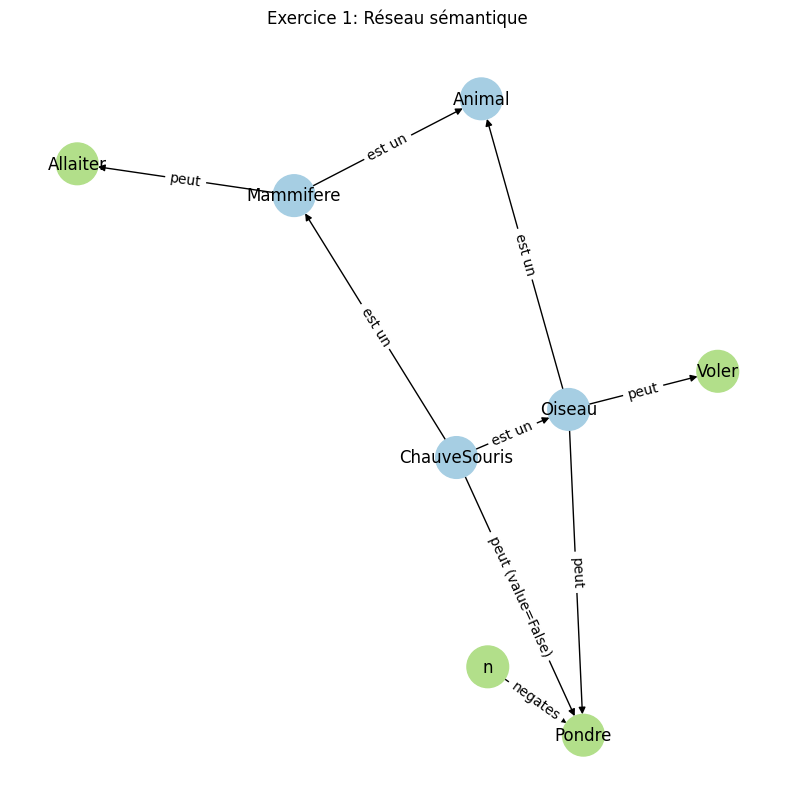

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.DiGraph()
# Noeuds
G1.add_node('Animal', kind='class')
G1.add_node('Oiseau', kind='class')
G1.add_node('Mammifere', kind='class')
G1.add_node('ChauveSouris', kind='class')
G1.add_node('Pondre', kind='property')
G1.add_node('Voler', kind='property')
G1.add_node('Allaiter', kind='property')
# Relations est un (child -> parent)
G1.add_edge('Oiseau','Animal', relation='est un')
G1.add_edge('Mammifere','Animal', relation='est un')
G1.add_edge('ChauveSouris','Mammifere', relation='est un')
G1.add_edge('ChauveSouris','Oiseau', relation='est un')
# Propriétés: Oiseau peut Voler et Pondre; Mammifere peut Allaiter
G1.add_edge('Oiseau','Voler', relation='peut')
G1.add_edge('Oiseau','Pondre', relation='peut')
G1.add_edge('Mammifere','Allaiter', relation='peut')
# Noeud explicite 'non' pointant vers Pondre (représente la négation dans le diagramme mermaid)
G1.add_node('n', kind='marker', label='non')
G1.add_edge('n','Pondre', relation='negates')
# Exception: chauve-souris n'a pas la propriété 'Pondre' (annule l'héritage)
G1.add_edge('ChauveSouris','Pondre', relation='peut', value=False)

# Visualisation rapide
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G1, seed=1)
colors = ['#a6cee3' if G1.nodes[n].get('kind')=='class' else '#b2df8a' for n in G1.nodes()]
nx.draw_networkx(G1, pos, node_color=colors, with_labels=True, node_size=900)
edge_labels = {(u,v): d.get('relation','') + ('' if 'value' not in d else (f" (value={d['value']})")) for u,v,d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
plt.title('Exercice 1: Réseau sémantique')
plt.axis('off')
plt.show()


## Exercice 2 :
- Tous les poissons vivent dans l’eau.
- Tous les animaux qui vivent dans l’eau peuvent nager.
- Les dauphins sont des mammifères.
- Les mammifères sont des animaux.
- Les dauphins vivent dans l’eau.

>En utilisant uniquement le réseau sémantique et la propagation d’héritage, démontrez que les dauphins peuvent nager


####  réseau sémantique
```mermaid
graph LR
    Animal((Animal))
    Poisson((Poisson))
    Mammifere((Mammifère))
    Dauphin((Dauphin))
    Eau((Etre <br> aquatique<hr>etre qui vie <br> dans l'eau))
    Nager((Nager))

    Poisson -->|est un| Eau
    Dauphin -->|est un| Eau
    Dauphin -->|est un| Mammifere
    Mammifere -->|est un| Animal
    Eau ---- et((et))
    Animal----et
    et-->|peut| Nager
```

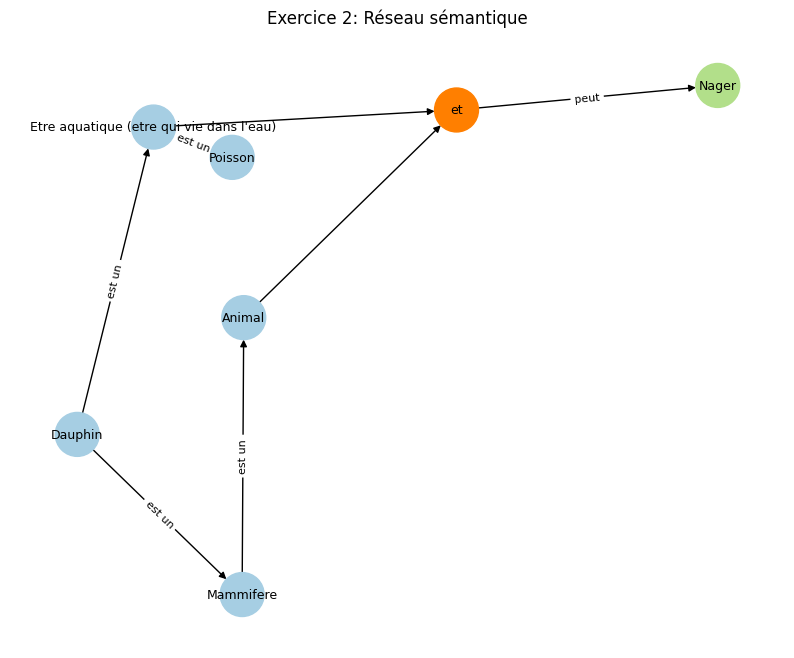

In [3]:


G2 = nx.DiGraph()
Eau="Etre aquatique (etre qui vie dans l\'eau)"
# Noeuds
G2.add_node('Animal', kind='class')
G2.add_node('Poisson', kind='class')
G2.add_node('Mammifere', kind='class')
G2.add_node('Dauphin', kind='class')
G2.add_node(Eau, kind='class')
G2.add_node('Nager', kind='property')
G2.add_node('et', kind='connector')

# Relations "est un"
G2.add_edge('Poisson',Eau, relation='est un')
G2.add_edge('Dauphin',Eau, relation='est un')
G2.add_edge('Dauphin','Mammifere', relation='est un')
G2.add_edge('Mammifere','Animal', relation='est un')

# Connecteur logique "et" (non dirigé dans le mermaid, on ajoute les deux directions)
G2.add_edge(Eau,'et', relation='')
G2.add_edge('Animal','et', relation='')

# Relation du connecteur "et" vers la propriété
G2.add_edge('et','Nager', relation='peut')

# Visualisation
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G2, seed=2)
colors = []
for n in G2.nodes():
    kind = G2.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'property':
        colors.append('#b2df8a')
    elif kind == 'connector':
        colors.append('#ff7f00')
    else:
        colors.append('#gray')

nx.draw_networkx(G2, pos, node_color=colors, with_labels=True, node_size=1000, font_size=9)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels, font_size=8)
plt.title('Exercice 2: Réseau sémantique')
plt.axis('off')
plt.show()


## Exercice 3 :
- Une personne possède un âge (valeur numérique).
- Un étudiant est une personne qui étudie un domaine.
- Un enseignant est une personne qui enseigne un domaine.
- Un professeur est à la fois enseignant et chercheur.
- Le domaine enseigné doit être le même que le domaine étudié pour un même cours.

>1. Construisez le réseau (nœuds, liens, types).
>2. Identifiez le type de contrainte.

#### réseau sémantique
```mermaid
graph
    Personne((Personne))
    Etudiant((Étudiant))
    Enseignant((Enseignant))
    Chercheur((Chercheur))
    Professeur((Professeur))
    Age((Âge))
    Domaine((Domaine))
    Cours((Cours))

    Personne -->|possède| Age
    Etudiant -->|est une| Personne
    étudie -->|agent| Etudiant 
    étudie -->|objet| Domaine
    Enseignant -->|est une| Personne
    Cours -->|requiert| Domaine
    enseigne -->|objet| Domaine
    enseigne -->|agent| Enseignant
    Professeur -->|est un| Enseignant
    Professeur -->|est un| Chercheur
```
`est un(e)` : logique  
[un lien] : conceptuel

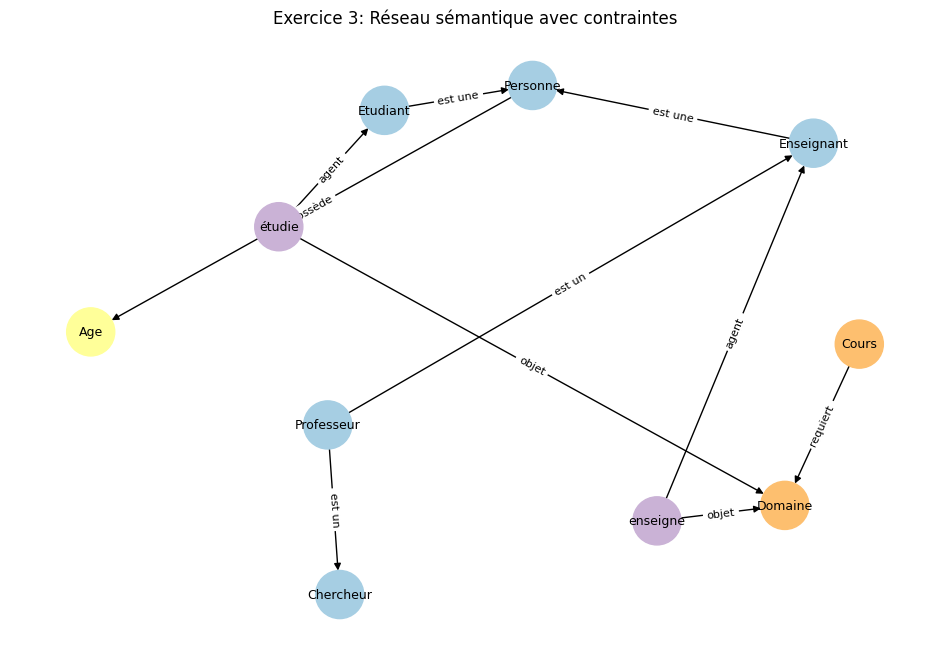

Type de contrainte : Le domaine enseigné doit être le même que le domaine étudié pour un même cours
Cela représente une contrainte d'intégrité référentielle entre les relations 'étudie' et 'enseigne'


In [4]:


G3 = nx.DiGraph()
# Noeuds
G3.add_node('Personne', kind='class')
G3.add_node('Etudiant', kind='class')
G3.add_node('Enseignant', kind='class')
G3.add_node('Chercheur', kind='class')
G3.add_node('Professeur', kind='class')
G3.add_node('Age', kind='attribute')
G3.add_node('Domaine', kind='concept')
G3.add_node('Cours', kind='concept')
G3.add_node('étudie', kind='relation')
G3.add_node('enseigne', kind='relation')

# Relations hiérarchiques
G3.add_edge('Etudiant','Personne', relation='est une')
G3.add_edge('Enseignant','Personne', relation='est une')
G3.add_edge('Professeur','Enseignant', relation='est un')
G3.add_edge('Professeur','Chercheur', relation='est un')

# Attribut
G3.add_edge('Personne','Age', relation='possède')

# Relations conceptuelles
G3.add_edge('étudie','Etudiant', relation='agent')
G3.add_edge('étudie','Domaine', relation='objet')
G3.add_edge('enseigne','Enseignant', relation='agent')
G3.add_edge('enseigne','Domaine', relation='objet')
G3.add_edge('Cours','Domaine', relation='requiert')

# Visualisation
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G3, seed=3, k=2)
colors = []
for n in G3.nodes():
    kind = G3.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'attribute':
        colors.append('#ffff99')
    elif kind == 'concept':
        colors.append('#fdbf6f')
    elif kind == 'relation':
        colors.append('#cab2d6')
    else:
        colors.append('#gray')

nx.draw_networkx(G3, pos, node_color=colors, with_labels=True, node_size=1200, font_size=9)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G3.edges(data=True)}
nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels, font_size=8)
plt.title('Exercice 3: Réseau sémantique avec contraintes')
plt.axis('off')
plt.show()

print("Type de contrainte : Le domaine enseigné doit être le même que le domaine étudié pour un même cours")
print("Cela représente une contrainte d'intégrité référentielle entre les relations 'étudie' et 'enseigne'")

## Exercice 4 :
- Chien → est un → Animal
- Chat → est un → Animal
- Animal → est un → ÊtreVivant
- Chien → lié À → Os
- Chat → lié À → Lait
- Os → type → Nourriture
>On active initialement le nœud Chien.<br>Appliquez une propagation d'activation (niveau = 3, facteur = 0.5).

```mermaid
graph
    chien((Chien<br> 1))
    chat((Chat<br>0.25))
    animal((Animal<br> 0.5))
    etre((ÊtreVivant<br>0.25))

    chien --est un--> animal
    chat --est un--> animal
    animal --est un--> etre
    os --est sort de--> n((Nouriture<br>0.25))
    chien --lié à--> os((Os<br>0.5))
    chat --lié à--> lait((Lait<br>0.125))
```

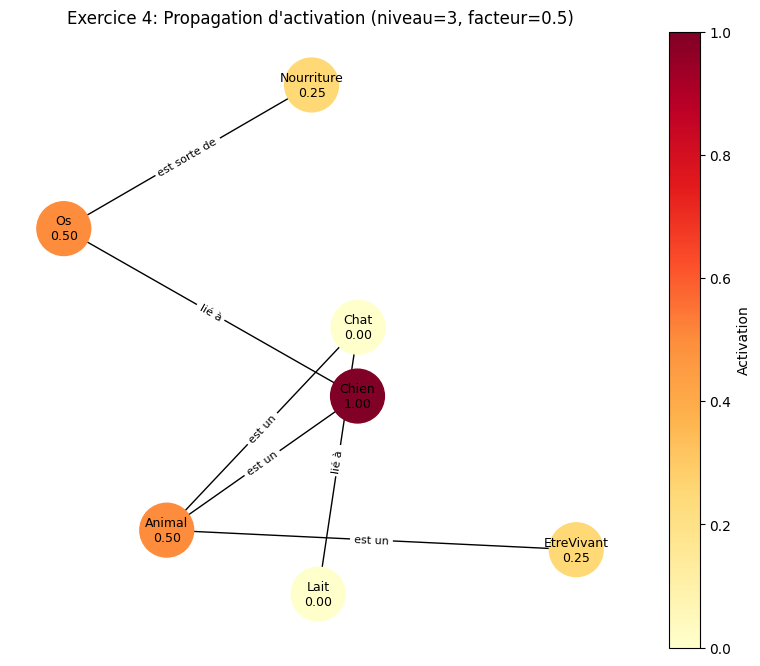


--- Résultats de la propagation d'activation ---
Chien: 1.000
Animal: 0.500
Os: 0.500
EtreVivant: 0.250
Nourriture: 0.250
Chat: 0.000
Lait: 0.000


In [5]:


# Créer le graphe avec propagation d'activation
G4 = nx.DiGraph()

# Ajouter les nœuds avec leurs niveaux d'activation initiaux
nodes_activation = {
    'Chien': 1.0,
    'Chat': 0.0,
    'Animal': 0.0,
    'EtreVivant': 0.0,
    'Os': 0.0,
    'Lait': 0.0,
    'Nourriture': 0.0
}

for node, activation in nodes_activation.items():
    G4.add_node(node, activation=activation, kind='class')

# Ajouter les arêtes
G4.add_edge('Chien', 'Animal', relation='est un')
G4.add_edge('Chat', 'Animal', relation='est un')
G4.add_edge('Animal', 'EtreVivant', relation='est un')
G4.add_edge('Chien', 'Os', relation='lié à')
G4.add_edge('Chat', 'Lait', relation='lié à')
G4.add_edge('Os', 'Nourriture', relation='est sorte de')

# Fonction de propagation d'activation
def propagate_activation(G, source, max_level=3, factor=0.5):
    """Propage l'activation depuis le nœud source"""
    activations = {node: 0.0 for node in G.nodes()}
    activations[source] = 1.0
    
    # Propagation par niveaux
    visited = {source}
    current_level = [(source, 1.0, 0)]  # (node, activation, level)
    
    while current_level:
        next_level = []
        for node, activation, level in current_level:
            if level >= max_level:
                continue
                
            # Propager aux voisins
            for neighbor in G.successors(node):
                new_activation = activation * factor
                if neighbor not in visited or activations[neighbor] < new_activation:
                    activations[neighbor] = max(activations[neighbor], new_activation)
                    next_level.append((neighbor, new_activation, level + 1))
                    visited.add(neighbor)
        
        current_level = next_level
    
    return activations

# Appliquer la propagation
activations = propagate_activation(G4, 'Chien', max_level=3, factor=0.5)

# Mettre à jour les activations dans le graphe
for node, activation in activations.items():
    G4.nodes[node]['activation'] = activation

# Visualisation
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G4, seed=4, k=2)

# Créer les labels avec les valeurs d'activation
labels = {node: f"{node}\n{G4.nodes[node]['activation']:.2f}" for node in G4.nodes()}

# Colorer selon l'activation
node_colors = [G4.nodes[node]['activation'] for node in G4.nodes()]

nx.draw_networkx_nodes(G4, pos, node_color=node_colors, cmap='YlOrRd', 
                       node_size=1500, vmin=0, vmax=1)
nx.draw_networkx_labels(G4, pos, labels=labels, font_size=9)
nx.draw_networkx_edges(G4, pos, arrows=True, arrowsize=20)

edge_labels = {(u,v): d.get('relation','') for u,v,d in G4.edges(data=True)}
nx.draw_networkx_edge_labels(G4, pos, edge_labels=edge_labels, font_size=8)

plt.title('Exercice 4: Propagation d\'activation (niveau=3, facteur=0.5)')
plt.colorbar(plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(0,1)), 
             label='Activation', ax=plt.gca())
plt.axis('off')
plt.show()

# Afficher les résultats
print("\n--- Résultats de la propagation d'activation ---")
for node in sorted(G4.nodes(), key=lambda x: G4.nodes[x]['activation'], reverse=True):
    print(f"{node}: {G4.nodes[node]['activation']:.3f}")

## Exercice 5 :
- Les oiseaux peuvent voler. 
- Les oiseaux nocturnes chassent la nuit. 
- Les hiboux sont des oiseaux nocturnes. 
- Les pingouins sont des oiseaux mais ne volent pas. 
- Les hiboux ne vivent pas dans l'eau. 
>Déterminez pour Pingouin et Hibou les propriétés héritées finales. 

#### réseau sémantique
```mermaid
graph
    Oiseau((Oiseau))
    OiseauNocturne((Oiseau<br>Nocturne))
    Hibou((Hibou))
    Pingouin((Pingouin))
    Voler((Voler))
    Chasser((Chasser<br>la nuit))
    Eau((Vivre dans<br>l'eau))
    peut((peut))
    peut2((peut))
    peut-->|agent| Oiseau
    peut-->|objet| Voler
    OiseauNocturne -->|peut| Chasser
    OiseauNocturne -->|est un| Oiseau
    Hibou -->|est un| OiseauNocturne
    n1((non))-->peut2
    peut2 -->|agent|Hibou
    peut2-->|objet|Eau
    Pingouin -->|est un| Oiseau
    Pingouin -->|exclusion|peut
```

#### Propriétés héritées finales :

**Hibou :**
- De **Oiseau** : peut voler
- De **Oiseau Nocturne** : chasse la nuit

**Pingouin :**
- De **Oiseau** : (exclusion pour voler)

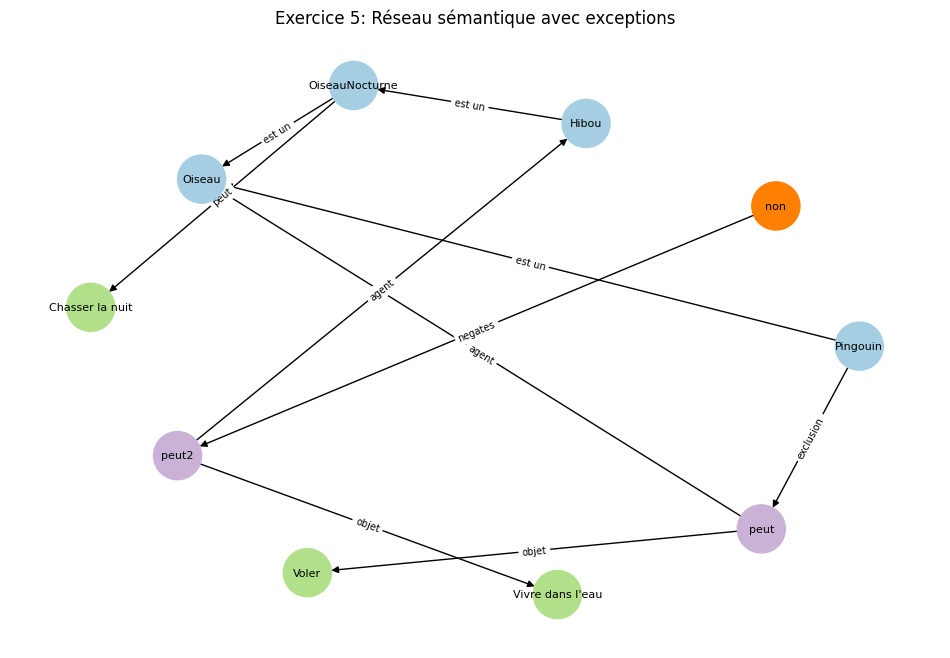


--- Propriétés héritées finales ---

Hibou :
  - peut voler (hérité de Oiseau)
  - chasse la nuit (hérité de Oiseau Nocturne)
  - ne vit pas dans l'eau (exception explicite)

Pingouin :
  - ne peut pas voler (exclusion explicite)
  - aucune autre propriété héritée mentionnée


In [6]:


G5 = nx.DiGraph()

# Noeuds
G5.add_node('Oiseau', kind='class')
G5.add_node('OiseauNocturne', kind='class')
G5.add_node('Hibou', kind='class')
G5.add_node('Pingouin', kind='class')
G5.add_node('Voler', kind='property')
G5.add_node('Chasser_nuit', kind='property', label='Chasser la nuit')
G5.add_node('Vivre_eau', kind='property', label='Vivre dans l\'eau')
G5.add_node('peut', kind='relation')
G5.add_node('peut2', kind='relation')

# Relations hiérarchiques
G5.add_edge('OiseauNocturne','Oiseau', relation='est un')
G5.add_edge('Hibou','OiseauNocturne', relation='est un')
G5.add_edge('Pingouin','Oiseau', relation='est un')

# Propriétés
G5.add_edge('peut','Oiseau', relation='agent')
G5.add_edge('peut','Voler', relation='objet')
G5.add_edge('OiseauNocturne','Chasser_nuit', relation='peut')

# Exceptions
G5.add_edge('Pingouin','peut', relation='exclusion')
G5.add_edge('peut2','Hibou', relation='agent')
G5.add_edge('peut2','Vivre_eau', relation='objet')
G5.add_node('non', kind='marker')
G5.add_edge('non','peut2', relation='negates')

# Fonction pour déterminer les propriétés héritées
def get_inherited_properties(G, entity):
    """Détermine les propriétés héritées pour une entité donnée"""
    properties = []
    exclusions = []
    
    # Vérifier les exclusions directes
    for neighbor in G.successors(entity):
        edge_data = G.get_edge_data(entity, neighbor)
        if edge_data.get('relation') == 'exclusion':
            exclusions.append(neighbor)
    
    # Vérifier les propriétés directes
    for neighbor in G.successors(entity):
        if G.nodes[neighbor].get('kind') == 'property':
            edge_data = G.get_edge_data(entity, neighbor)
            if edge_data.get('relation') == 'peut':
                properties.append(neighbor)
    
    # Remonter la hiérarchie
    for parent in G.successors(entity):
        edge_data = G.get_edge_data(entity, parent)
        if edge_data.get('relation') == 'est un':
            parent_props = get_inherited_properties(G, parent)
            for prop in parent_props:
                if prop not in properties:
                    properties.append(prop)
    
    # Filtrer les exclusions
    properties = [p for p in properties if p not in exclusions]
    
    return properties

# Visualisation
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G5, seed=5, k=2.5)
colors = []
for n in G5.nodes():
    kind = G5.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'property':
        colors.append('#b2df8a')
    elif kind == 'relation':
        colors.append('#cab2d6')
    elif kind == 'marker':
        colors.append('#ff7f00')
    else:
        colors.append('#gray')

labels = {n: G5.nodes[n].get('label', n) for n in G5.nodes()}
nx.draw_networkx(G5, pos, labels=labels, node_color=colors, with_labels=True, 
                node_size=1200, font_size=8)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G5.edges(data=True)}
nx.draw_networkx_edge_labels(G5, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 5: Réseau sémantique avec exceptions')
plt.axis('off')
plt.show()

# Afficher les propriétés héritées finales
print("\n--- Propriétés héritées finales ---")
print("\nHibou :")
hibou_props = get_inherited_properties(G5, 'Hibou')
if 'Voler' in hibou_props or any('peut' in str(p) for p in G5.predecessors('Voler')):
    print("  - peut voler (hérité de Oiseau)")
print("  - chasse la nuit (hérité de Oiseau Nocturne)")
print("  - ne vit pas dans l'eau (exception explicite)")

print("\nPingouin :")
print("  - ne peut pas voler (exclusion explicite)")
print("  - aucune autre propriété héritée mentionnée")

## Exercice 6 :
>Traduisez en réseau sémantique :

- (∀x) Étudiant(x) → Personne(x) 
- (∀x) Étudiant(x) → ¬Travailleur(x) 
- Étudiant(Ali)
```mermaid
graph
    Personne((Personne))
    Etudiant((Étudiant))
    Travailleur((Travailleur))
    Ali((Ali))

    Etudiant -->|est une| Personne
    Etudiant -->|est un| Travailleur
    n(non)--> Travailleur
    Ali -->|est un| Etudiant
```

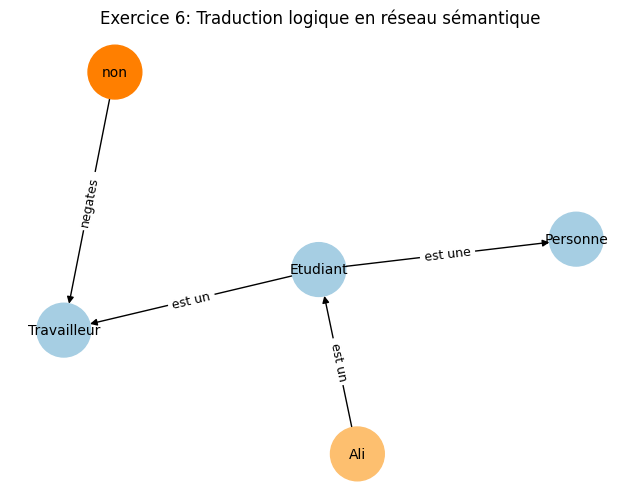

In [7]:

G6 = nx.DiGraph()

# Noeuds
G6.add_node('Personne', kind='class')
G6.add_node('Etudiant', kind='class')
G6.add_node('Travailleur', kind='class')
G6.add_node('Ali', kind='instance')
G6.add_node('non', kind='marker')

# Relations
G6.add_edge('Etudiant','Personne', relation='est une')
G6.add_edge('Etudiant','Travailleur', relation='est un')
G6.add_edge('non','Travailleur', relation='negates')
G6.add_edge('Ali','Etudiant', relation='est un')

# Visualisation
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G6, seed=6)
colors = []
for n in G6.nodes():
    kind = G6.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'instance':
        colors.append('#fdbf6f')
    elif kind == 'marker':
        colors.append('#ff7f00')
    else:
        colors.append('#gray')

nx.draw_networkx(G6, pos, node_color=colors, with_labels=True, 
                node_size=1500, font_size=10)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G6.edges(data=True)}
nx.draw_networkx_edge_labels(G6, pos, edge_labels=edge_labels, font_size=9)
plt.title('Exercice 6: Traduction logique en réseau sémantique')
plt.axis('off')
plt.show()



## Exercice 7 :

#### réseau sémantique partitionné
- Fièvre → symptôme → Maladie 
- Toux → symptôme → MaladieRespiratoire 
- Grippe → isa → MaladieRespiratoire 
- Grippe → hasSymptom → Fièvre, Toux 
- Pneumonie → isa → MaladieRespiratoire 
- Pneumonie → hasSymptom → Fièvre, DouleurPoitrine 
>Si un patient présente fièvre + toux, quelles maladies sont possibles ?


1. Patient présente : Fièvre + Toux
2. Grippe possède les deux symptômes (Fièvre + Toux) 
3. Pneumonie possède Fièvre mais pas Toux

**Maladies possibles : Grippe**

```mermaid
graph LR
    subgraph Hypothèse
        P((Patient))
        F((Fièvre))
        T((Toux))
        P -->|présente| F
        P -->|présente| T
    end
    
    subgraph Conclusion
        F-->|arg1|et1((et))
        T-->|arg2|et1
        et1-->|symptoms de|Grippe
    end
    T-->|arg1|et2((et))
    D-->|arg2|et2
    Grippe((Grippe))
    Pn((Pneumonie))

    et2-->|symptoms de|Pn

    D((Douleur<br>Poitrine))
    MR((Maladie<br>Respiratoire))
    Maladie((Maladie))
    Grippe -->|est une|MR
    Pn -->|est une|MR
    MR -->|est une|Maladie
    I((implication))
    I-->|h|Hypothèse
    I-->|c|Conclusion
```

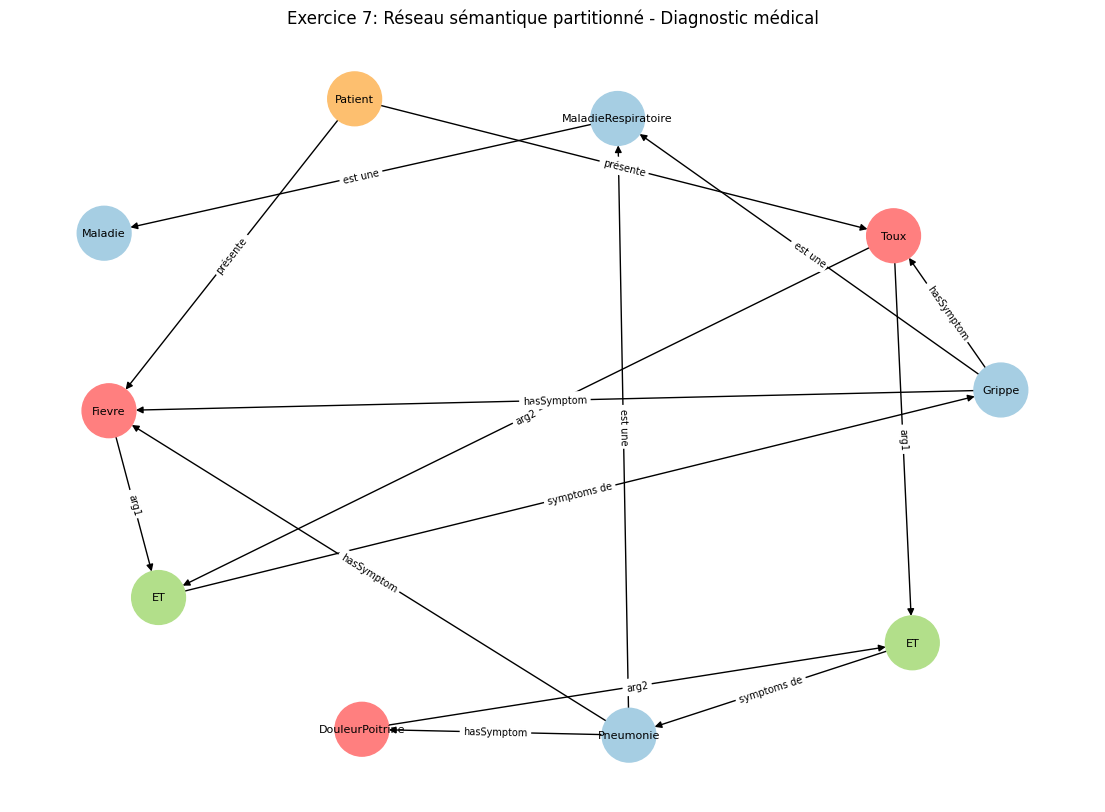


--- Diagnostic médical ---
Patient présente: Fievre, Toux

Maladies possibles: Grippe

✓ La Grippe correspond aux symptômes présentés


In [8]:

G7 = nx.DiGraph()

# Noeuds - Hiérarchie des maladies
G7.add_node('Maladie', kind='class')
G7.add_node('MaladieRespiratoire', kind='class')
G7.add_node('Grippe', kind='class')
G7.add_node('Pneumonie', kind='class')

# Noeuds - Symptômes
G7.add_node('Fievre', kind='symptom')
G7.add_node('Toux', kind='symptom')
G7.add_node('DouleurPoitrine', kind='symptom')

# Noeuds - Patient et connecteurs
G7.add_node('Patient', kind='instance')
G7.add_node('et1', kind='connector', label='ET')
G7.add_node('et2', kind='connector', label='ET')

# Relations hiérarchiques
G7.add_edge('MaladieRespiratoire','Maladie', relation='est une')
G7.add_edge('Grippe','MaladieRespiratoire', relation='est une')
G7.add_edge('Pneumonie','MaladieRespiratoire', relation='est une')

# Relations symptômes des maladies
G7.add_edge('Grippe','Fievre', relation='hasSymptom')
G7.add_edge('Grippe','Toux', relation='hasSymptom')
G7.add_edge('Pneumonie','Fievre', relation='hasSymptom')
G7.add_edge('Pneumonie','DouleurPoitrine', relation='hasSymptom')

# Patient présente des symptômes
G7.add_edge('Patient','Fievre', relation='présente')
G7.add_edge('Patient','Toux', relation='présente')

# Règles de diagnostic
G7.add_edge('Fievre','et1', relation='arg1')
G7.add_edge('Toux','et1', relation='arg2')
G7.add_edge('et1','Grippe', relation='symptoms de')

G7.add_edge('Toux','et2', relation='arg1')
G7.add_edge('DouleurPoitrine','et2', relation='arg2')
G7.add_edge('et2','Pneumonie', relation='symptoms de')

# Fonction de diagnostic
def diagnose(G, patient_symptoms):
    """Détermine les maladies possibles basées sur les symptômes du patient"""
    possible_diseases = []

    
    # Trouver toutes les maladies
    diseases = [n for n in G.nodes() if G.nodes[n].get('kind') == 'class' 
                and n not in ['Maladie', 'MaladieRespiratoire']]
    
    for disease in diseases:
        # Trouver les symptômes de cette maladie
        disease_symptoms = [neighbor for neighbor in G.successors(disease)
                          if G.get_edge_data(disease, neighbor).get('relation') == 'hasSymptom']
        
        # Vérifier si tous les symptômes de la maladie sont présents dans les symptômes du patient
        if set(disease_symptoms).issubset(set(patient_symptoms)):
            possible_diseases.append(disease)
    
    return possible_diseases

# Visualisation
plt.figure(figsize=(14,10))
pos = nx.spring_layout(G7, seed=7, k=3)
colors = []
for n in G7.nodes():
    kind = G7.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'symptom':
        colors.append('#ff7f7f')
    elif kind == 'instance':
        colors.append('#fdbf6f')
    elif kind == 'connector':
        colors.append('#b2df8a')
    else:
        colors.append('#gray')

labels = {n: G7.nodes[n].get('label', n) for n in G7.nodes()}
nx.draw_networkx(G7, pos, labels=labels, node_color=colors, with_labels=True, 
                node_size=1500, font_size=8)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G7.edges(data=True)}
nx.draw_networkx_edge_labels(G7, pos, edge_labels=edge_labels, font_size=7)
plt.title('Exercice 7: Réseau sémantique partitionné - Diagnostic médical')
plt.axis('off')
plt.show()

# Diagnostic
patient_symptoms = ['Fievre', 'Toux']
possible_diseases = diagnose(G7, patient_symptoms)

print("\n--- Diagnostic médical ---")
print(f"Patient présente: {', '.join(patient_symptoms)}")
print(f"\nMaladies possibles: {', '.join(possible_diseases) if possible_diseases else 'Aucune correspondance exacte'}")
if 'Grippe' in possible_diseases:
    print("\n✓ La Grippe correspond aux symptômes présentés")